<h1>Flower Classification </h1>


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_dir = pathlib.Path('C:\\Users\\Dell\\flowers')
data_dir

WindowsPath('C:/Users/Dell/flowers')

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

4306

In [8]:
import PIL.Image
Image


<module 'PIL.Image' from 'C:\\Users\\Dell\\anaconda3\\lib\\site-packages\\PIL\\Image.py'>

784


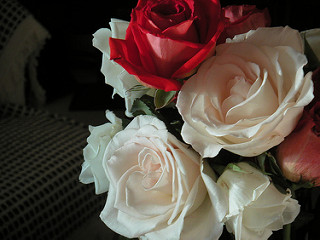

In [9]:
roses = list(data_dir.glob('rose/*.jpg'))
print(len(roses))

PIL.Image.open(str(roses[1]))

In [10]:
batch_size=32
image_height=180
image_width= 180

In [11]:

train_data= tf.keras.utils.image_dataset_from_directory(data_dir,
                                                       seed=121,
                                                       validation_split=0.2,
                                                        subset='training',
                                                       batch_size= batch_size,
                                                       image_size=(image_height, image_width))

Found 4306 files belonging to 5 classes.
Using 3445 files for training.


In [12]:
val_Ds = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                    seed=121,
                                                    validation_split=0.2,
                                                    subset='validation',
                                                    batch_size= batch_size,
                                                    image_size= (image_height,image_width))

Found 4306 files belonging to 5 classes.
Using 861 files for validation.


In [13]:
print(train_data.class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [14]:
class_names= train_data.class_names

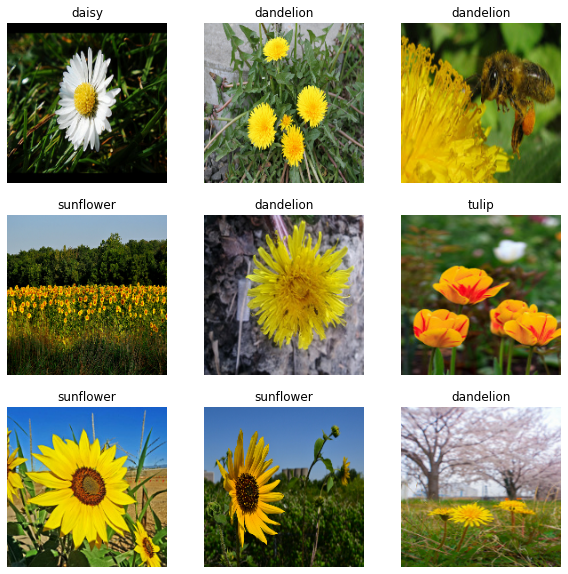

In [15]:
plt.figure(figsize=(10,10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [16]:
for train_batch, labels_batch in train_data:
    print(train_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [17]:
inputs= keras.Input(shape=(180,180,3))

x= layers.Rescaling(1./255)(inputs)
x= layers.Conv2D(filters=32,kernel_size=3, activation='relu')(x)
x= layers.MaxPooling2D(pool_size=2)(x)
x= layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x= layers.Flatten()(x)

outputs=layers.Dense(len(class_names), activation='softmax')(x)

model =  keras.Model(inputs= inputs, outputs= outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 484416)            0         
                                                             

In [18]:
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [20]:
callbacks= [keras.callbacks.ModelCheckpoint("flower_dense.keras",
                                            monitor='val_accuracy',
                                          save_best_only=True),
          ]
""" keras.callbacks.EarlyStopping(monitor='val_loss',
                                        patience=2)"""

" keras.callbacks.EarlyStopping(monitor='val_loss',\n                                        patience=2)"

In [21]:
history= model.fit(train_data, 
                  epochs=25,
                  validation_data=val_Ds,
                  callbacks=callbacks)

Epoch 1/25
108/108 [==============================] - 102s 910ms/step - loss: 2.0929 - accuracy: 0.4293 - val_loss: 1.3283 - val_accuracy: 0.4390
Epoch 2/25
108/108 [==============================] - 95s 872ms/step - loss: 0.9751 - accuracy: 0.6569 - val_loss: 1.1461 - val_accuracy: 0.5447
Epoch 3/25
108/108 [==============================] - 95s 873ms/step - loss: 0.5069 - accuracy: 0.8450 - val_loss: 1.3541 - val_accuracy: 0.5319
Epoch 4/25
108/108 [==============================] - 94s 871ms/step - loss: 0.2198 - accuracy: 0.9411 - val_loss: 1.7689 - val_accuracy: 0.5215
Epoch 5/25
108/108 [==============================] - 95s 881ms/step - loss: 0.1466 - accuracy: 0.9591 - val_loss: 1.9864 - val_accuracy: 0.5319
Epoch 6/25
108/108 [==============================] - 124s 1s/step - loss: 0.1267 - accuracy: 0.9756 - val_loss: 2.2476 - val_accuracy: 0.5168
Epoch 7/25
108/108 [==============================] - 132s 1s/step - loss: 0.1334 - accuracy: 0.9852 - val_loss: 2.8690 - val_accur

In [23]:
data_augmentation= keras.Sequential([
                                    layers.RandomFlip('horizontal'),
                                    layers.RandomZoom(0.2),
                                    layers.RandomRotation(0.1)
])

In [24]:
inputs= keras.Input(shape=(180,180,3))
x= data_augmentation(inputs)
x= layers.Rescaling(1./255)(x)
x= layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x= layers.MaxPooling2D(pool_size=2)(x)
x= layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x= layers.MaxPooling2D(pool_size=2)(x)
x= layers.Flatten()(x)
outputs= layers.Dense(5, activation='softmax')(x)
model= keras.Model(inputs= inputs, outputs= outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 87, 87, 64)        18496     
                                                           

In [27]:
model.compile(optimizer='rmsprop',
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])

In [ ]:
history= model.fit(train_data,
                   epochs=20,
                   validation_data= val_Ds,
                   callbacks= callbacks
                  )

Epoch 1/20
108/108 [==============================] - 204s 2s/step - loss: 1.5107 - accuracy: 0.4302 - val_loss: 1.3676 - val_accuracy: 0.4750
Epoch 2/20
 46/108 [===========>..................] - ETA: 34:17 - loss: 1.1749 - accuracy: 0.5353